In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [5]:
# Reading the dataset
df = pd.read_csv('epi_r.csv')

In [6]:
# Checking the shape (number of rows and columns)
df.shape

(20052, 680)

In [7]:
# Viewing the dataset 
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Checking null values in dataset
df.isna().sum().sort_values(ascending = False)

fat               4183
protein           4162
sodium            4119
calories          4117
title                0
                  ... 
friendsgiving        0
frittata             0
fritter              0
frozen dessert       0
turkey               0
Length: 680, dtype: int64

In [46]:
# Since our dataset contains 200052 samples. We will aim to reduce the sample count in order to reduce computation cost.
# Instead of imputing the missing values before reducing sample size, rows with missing values will be removed consequently reducing the size.

In [12]:
# Removing na values
df1 = df.dropna()

In [13]:
# Checking that na values were removed
df1.isna().sum().sort_values(ascending = False)

title            0
peach            0
party            0
pasadena         0
passion fruit    0
                ..
freeze/chill     0
freezer food     0
friendsgiving    0
frittata         0
turkey           0
Length: 680, dtype: int64

In [14]:
# Checking the new shape of our dataset
df1.shape

(15864, 680)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15864 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 82.4+ MB


In [16]:
# Checking the statistics of the numerical columns in our dataset
df1.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,15864.000000,1.586400e+04,15864.000000,1.586400e+04,1.586400e+04,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,...,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000
mean,3.760952,6.350683e+03,100.324571,3.469868e+02,6.252742e+03,0.000378,0.000063,0.000946,0.001261,0.000441,...,0.001261,0.022504,0.000063,0.000315,0.014183,0.000126,0.000315,0.001324,0.000819,0.021243
std,1.285518,3.598484e+05,3843.462312,2.045933e+04,3.340421e+05,0.019445,0.007940,0.030736,0.035485,0.021002,...,0.035485,0.148320,0.007940,0.017751,0.118249,0.011228,0.017751,0.036360,0.028615,0.144198
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.990000e+02,3.000000,7.000000e+00,8.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.330000e+02,8.000000,1.700000e+01,2.960000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.872500e+02,27.000000,3.300000e+01,7.130000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Reading the 'Categories 1.txt' file which contains the reduced number of columns that we want in our dataset
# Each desired column is added as a key to the categories_dict dictionary

categories_dict = {}
with open('Categories 1.txt', 'r') as file:
    for line in file:
        category = line.strip()
        categories_dict[category] = True

In [22]:
# Iterating over each column in our dataset, checking if the column is a key in categories_dict, dropping the column otherwise
for column in df1.columns:
    if column not in categories_dict:
        df1 = df1.drop(column, axis=1)

In [23]:
# Checking the new shape of our dataset
df1.shape

(15864, 521)

In [24]:
# Viewing the dataset with the dropped columns
df1.head()

,title,calories,protein,fat,sodium,alabama,alaska,almond,amaretto,anchovy,...,windsor,wine,winter,wok,yellow squash,yonkers,zucchini,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Specifying the meal types columns (which will be predicted) in a list called categories
categories = ['breakfast', 'lunch', 'dinner', 'side', 'appetizer', 'dessert', 'snack']

# Creating a new column called 'meal_type' containing the corresponding meal type of each sample 
for index, row in df1.iterrows():
    for category in categories:
        if row[category] == 1:
            df1.at[index, 'meal_type'] = category
            break

In [26]:
# Checking the new shape of our dataset
df1.shape

(15864, 522)

In [27]:
# Dropping all na values in the meal_type column ie. those that do not fall into any of the meal type categories
df2 = df1.dropna(subset=['meal_type'])

In [28]:
# Removing all the previously one-hot encoded meal type columns, keeping the meal_type column insteaad
df2 = df2.drop(['breakfast', 'lunch', 'dinner', 'side', 'appetizer', 'dessert', 'snack'], axis = 1)

In [29]:
# Checking the shape again
df2.shape

(8755, 515)

In [30]:
# Viewing the count of each meal_type value
df2['meal_type'].value_counts()

meal_type
dessert      2831
side         2224
dinner       1503
lunch         903
appetizer     744
breakfast     541
snack           9
Name: count, dtype: int64

In [31]:
# Removing the snack category since only 9 samples out of 8755 correspond to snack and thus removing it improves accuracy
df2 = df2[df2['meal_type'] != 'snack']

In [32]:
df2['meal_type'].value_counts()

meal_type
dessert      2831
side         2224
dinner       1503
lunch         903
appetizer     744
breakfast     541
Name: count, dtype: int64

In [33]:
df2.head()

,title,calories,protein,fat,sodium,alabama,alaska,almond,amaretto,anchovy,...,windsor,wine,winter,wok,yellow squash,yonkers,zucchini,snack week,turkey,meal_type
4,Spinach Noodle Casserole,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,side
9,Ham Persillade with Mustard Potato Salad and M...,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lunch
10,"Yams Braised with Cream, Rosemary and Nutmeg",256.0,4.0,5.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,side
12,Banana-Chocolate Chip Cake With Peanut Butter ...,766.0,12.0,48.0,439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dessert
16,Sweet Buttermilk Spoon Breads,146.0,4.0,5.0,160.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,breakfast


Text(0.5, 1.0, 'Meal Type Distribution')

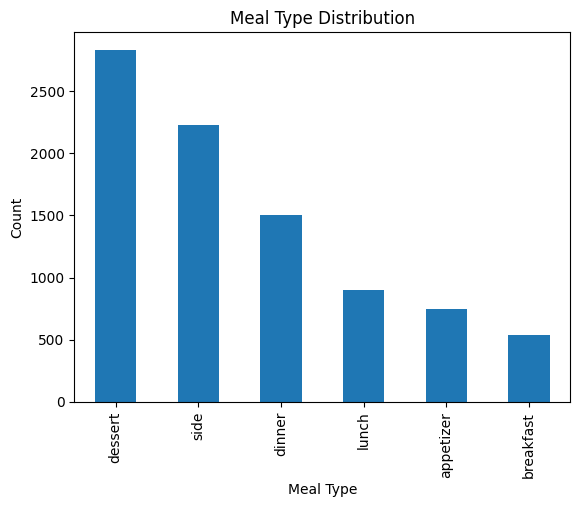

In [41]:
# Viewing the meal type distribution in a bar graph
import matplotlib.pyplot as plt
df2['meal_type'].value_counts().plot(kind = 'bar')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title('Meal Type Distribution')

In [34]:
# X contains all columns (corresponding to ingredients)
X = df2.drop(['title','calories','protein','fat','sodium','meal_type'], axis = 1).values
# Y contains the meal_type values
y = df2['meal_type'].values

In [35]:
# Splitting our dataset between training and testing with test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [36]:
# Resampling our training data to reduce the class imbalance and produce better results
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [37]:
# classifier contains our models
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter = 10000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

# param_grids for each model specified for GridSearch
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11]},
    'Random Forest': {'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 5, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Naive Bayes': {}
}

best_estimators = {}

In [39]:
# kfold of 5 splits was used, with shuffle set to True
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Training each model, printing the best parameters and the best cv score
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    param_grid = param_grids[name]
    grid_search = GridSearchCV(classifier, param_grid, cv=kfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_estimators[name] = grid_search.best_estimator_
    
    print("Best parameters found:")
    print(grid_search.best_params_)
    print("Best cross-validation score:")
    print(grid_search.best_score_)
    print('\n')

Training Logistic Regression...
Best parameters found:
{'C': 1}
Best cross-validation score:
0.7754006936107777


Training KNN...
Best parameters found:
{'n_neighbors': 5}
Best cross-validation score:
0.6326354541816727


Training Random Forest...
Best parameters found:
{'max_depth': None, 'n_estimators': 200}
Best cross-validation score:
0.7718053888221955


Training SVM...
Best parameters found:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score:
0.7873249299719888


Training Naive Bayes...
Best parameters found:
{}
Best cross-validation score:
0.4072084833933573




In [40]:
# printing the prediction accuracy on the test set for each of the models
for name, estimator in best_estimators.items():
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy}")

Accuracy for Logistic Regression: 0.7717225609756098
Accuracy for KNN: 0.6360518292682927
Accuracy for Random Forest: 0.7778201219512195
Accuracy for SVM: 0.7896341463414634
Accuracy for Naive Bayes: 0.4641768292682927
